In [626]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [627]:
train_quants = pd.read_excel('TRAIN_QUANTITATIVE_METADATA_new.xlsx')
train_quants.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [628]:
train_target = pd.read_excel('TRAINING_SOLUTIONS.xlsx')
train_target.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [629]:
train_quant_new = pd.merge(train_quants, train_target, on='participant_id', how='left')
train_quant_new.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,...,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127,1,0
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,...,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN,1,0
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,...,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381,0,1
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,...,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553,0,1
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,...,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574,1,0


In [630]:
train_quant_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1204 

In [631]:
test_quant = pd.read_excel('TEST_QUANTITATIVE_METADATA.xlsx')
test_quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


In [632]:
test_quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              304 non-null    object 
 1   EHQ_EHQ_Total               303 non-null    float64
 2   ColorVision_CV_Score        295 non-null    float64
 3   APQ_P_APQ_P_CP              289 non-null    float64
 4   APQ_P_APQ_P_ID              289 non-null    float64
 5   APQ_P_APQ_P_INV             289 non-null    float64
 6   APQ_P_APQ_P_OPD             289 non-null    float64
 7   APQ_P_APQ_P_PM              289 non-null    float64
 8   APQ_P_APQ_P_PP              289 non-null    float64
 9   SDQ_SDQ_Conduct_Problems    274 non-null    float64
 10  SDQ_SDQ_Difficulties_Total  274 non-null    float64
 11  SDQ_SDQ_Emotional_Problems  274 non-null    float64
 12  SDQ_SDQ_Externalizing       274 non-null    float64
 13  SDQ_SDQ_Generating_Impact   274 non

In [633]:
train_cat = pd.read_csv('train_cat.csv')
test_cat = pd.read_csv('test_cat.csv')

In [634]:
test_new = pd.merge(test_quant, test_cat, on='participant_id', how='left')
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 40 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   participant_id                        304 non-null    object 
 1   EHQ_EHQ_Total                         303 non-null    float64
 2   ColorVision_CV_Score                  295 non-null    float64
 3   APQ_P_APQ_P_CP                        289 non-null    float64
 4   APQ_P_APQ_P_ID                        289 non-null    float64
 5   APQ_P_APQ_P_INV                       289 non-null    float64
 6   APQ_P_APQ_P_OPD                       289 non-null    float64
 7   APQ_P_APQ_P_PM                        289 non-null    float64
 8   APQ_P_APQ_P_PP                        289 non-null    float64
 9   SDQ_SDQ_Conduct_Problems              274 non-null    float64
 10  SDQ_SDQ_Difficulties_Total            274 non-null    float64
 11  SDQ_SDQ_Emotional_P

In [635]:
train_new = pd.merge(train_quant_new, train_cat, on='participant_id', how='left')
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   participant_id                        1213 non-null   object 
 1   EHQ_EHQ_Total                         1200 non-null   float64
 2   ColorVision_CV_Score                  1190 non-null   float64
 3   APQ_P_APQ_P_CP                        1201 non-null   float64
 4   APQ_P_APQ_P_ID                        1201 non-null   float64
 5   APQ_P_APQ_P_INV                       1201 non-null   float64
 6   APQ_P_APQ_P_OPD                       1201 non-null   float64
 7   APQ_P_APQ_P_PM                        1201 non-null   float64
 8   APQ_P_APQ_P_PP                        1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems              1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total            1204 non-null   float64
 11  SDQ_SDQ_Emotional

In [636]:
train_new.drop(columns=['Sex_F'], inplace=True)

In [637]:
train_new.set_index('participant_id', inplace=True)
test_new.set_index('participant_id', inplace=True)

In [638]:
# Chia train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(train_new, test_size=0.2, stratify = train_new['ADHD_Outcome'])
X_train = df_train.copy()
y_train = X_train.pop('ADHD_Outcome')

X_test = df_test.copy()
y_test = X_test.pop('ADHD_Outcome')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(970, 42) (970,)
(243, 42) (243,)


In [639]:
apq_col = ['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']
sdq_col = ['SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
        'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
        'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial']

In [640]:
def preprocessing_train(df):
    for i in apq_col:
        mode_value = df[i].mode()[0]
        df[i] = df[i].fillna(mode_value)
    df['EHQ_EHQ_Total'] = df['EHQ_EHQ_Total'].fillna(df['EHQ_EHQ_Total'].mode()[0])
    df['MRI_Track_Age_at_Scan'] = df['MRI_Track_Age_at_Scan'].replace(0, np.nan)
    df['MRI_Track_Age_at_Scan'] = df['MRI_Track_Age_at_Scan'].fillna(df['MRI_Track_Age_at_Scan'].mean())
    df['ColorVision_CV_Score'] = df['ColorVision_CV_Score'].fillna(df['ColorVision_CV_Score'].mode()[0])
    df['Pass_ColorVision_CV_Score'] = df['ColorVision_CV_Score'] >= 10
    df['Pass_ColorVision_CV_Score'] = df['Pass_ColorVision_CV_Score'].astype(int)
    df.drop(columns=['ColorVision_CV_Score'], inplace=True)
    for i in sdq_col:
        df[i] = df[i].fillna(df[i].median())
    return df

In [641]:
def preprocessing_test(df):
    df['EHQ_EHQ_Total'] = df['EHQ_EHQ_Total'].fillna(df['EHQ_EHQ_Total'].mode()[0])
    df['EHQ_EHQ_Total'] = df['EHQ_EHQ_Total'].clip(lower=-100, upper=100)
    for i in apq_col:
        mode_value_test = df[i].mode()[0]
        df[i] = df[i].fillna(mode_value_test)
    df['ColorVision_CV_Score'] = df['ColorVision_CV_Score'].fillna(df['ColorVision_CV_Score'].mode()[0])
    df['Pass_ColorVision_CV_Score'] = df['ColorVision_CV_Score'] >= 10
    df['Pass_ColorVision_CV_Score'] = df['Pass_ColorVision_CV_Score'].astype(int)
    df.drop(columns=['ColorVision_CV_Score'], inplace=True)
    for i in sdq_col:
        df[i] = df[i].fillna(df[i].median())
    return df

In [642]:
def age_group(x):
    if x < 8:
        return 'young_child'
    elif x < 12:
        return 'child'
    elif x < 16:
        return 'teen'
    else:
        return 'young_adult'

In [643]:
def classify_handedness(score):
    if score <= -28:
        return "Left"
    elif score >= 48:
        return "Right"
    else:
        return "Middle"

In [644]:
def FE_quant(df):
    scaler = StandardScaler()
    parenting_scaled = scaler.fit_transform(df[apq_col])
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Parenting_Type'] = kmeans.fit_predict(parenting_scaled)
    # df[apq_col] = MinMaxScaler(feature_range=(0, 10)).fit_transform(df[apq_col])
    df['APQ_Positive'] = df[['APQ_P_APQ_P_PM', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_PP']].mean(axis=1)
    df['APQ_Negative'] = df[['APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID']].mean(axis=1)
    df['SDQ_SDQ_Prosocial_Inverted'] = 10 - df['SDQ_SDQ_Prosocial']  # Vì max = 10
    sdq_problem_cols = [col for col in df.columns if col.startswith("SDQ_") and "Prosocial" not in col]
    df['SDQ_Total_Problems'] = df[sdq_problem_cols].sum(axis=1)
    df['ParentingStyle_vs_Problems'] = df['APQ_Negative'] * df['SDQ_Total_Problems']
    df['Positive_to_Negative_APQ_Ratio'] = df['APQ_Positive'] / (df['APQ_Negative'] + 1e-5)
    df['MRI_Age_Group'] = df['MRI_Track_Age_at_Scan'].apply(age_group)
    # df['MRI_Age_Group'] = OneHotEncoder().fit_transform(df[['MRI_Age_Group']]).toarray() 
    df["Handedness"] = df["EHQ_EHQ_Total"].apply(classify_handedness)
    # df["Handedness"] = OneHotEncoder().fit_transform(df[["Handedness"]]).toarray()
    return df

In [645]:
X_train = preprocessing_train(X_train)
X_test = preprocessing_train(X_test)
X_train = FE_quant(X_train)
X_test = FE_quant(X_test)

In [646]:
# train_new = preprocessing_train(train_new)
# train_new = FE_quant(train_new)
# train_new.drop(columns=['Sex_F'], inplace=True)
# train_quant_new.to_csv('train_quant_new.csv', index=False)

In [647]:
test_new = preprocessing_test(test_new)
test_new = FE_quant(test_new)
# test_quant.to_csv('test_quant_new.csv', index=False)

In [648]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(train_quant_new, title="Pandas Profiling Report", explorative=True)
# profile.to_file("train_quant_report.html")

In [649]:
# train_new.drop(columns=['Sex_F'], inplace=True)


In [650]:
num_names = list(X_train.select_dtypes(['float', 'int']).columns)
cat_names = list(X_train.select_dtypes(['object']).columns)
# Chọn các biến số liên tục và biến phân loại
from sklearn.preprocessing import PowerTransformer

num_pl = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', RobustScaler()),
    ('power', PowerTransformer())  # fix skewness
])
cat_pl = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Áp dụng ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pl, num_names),
    ('cat', cat_pl, cat_names)
])

In [651]:
X_train.shape, y_train.shape

((970, 51), (970,))

In [652]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Your pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(rf_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Cross-validated scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")


Cross-validated scores: [0.84536082 0.79381443 0.81443299 0.80412371 0.74226804 0.82474227
 0.77319588 0.74226804 0.77319588 0.81443299]
Mean CV accuracy: 0.79


In [653]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
print('MSE Random Forest:', mean_squared_error(y_test, y_pred_rf))

MSE Random Forest: 0.18106995884773663


In [654]:
%matplotlib inline

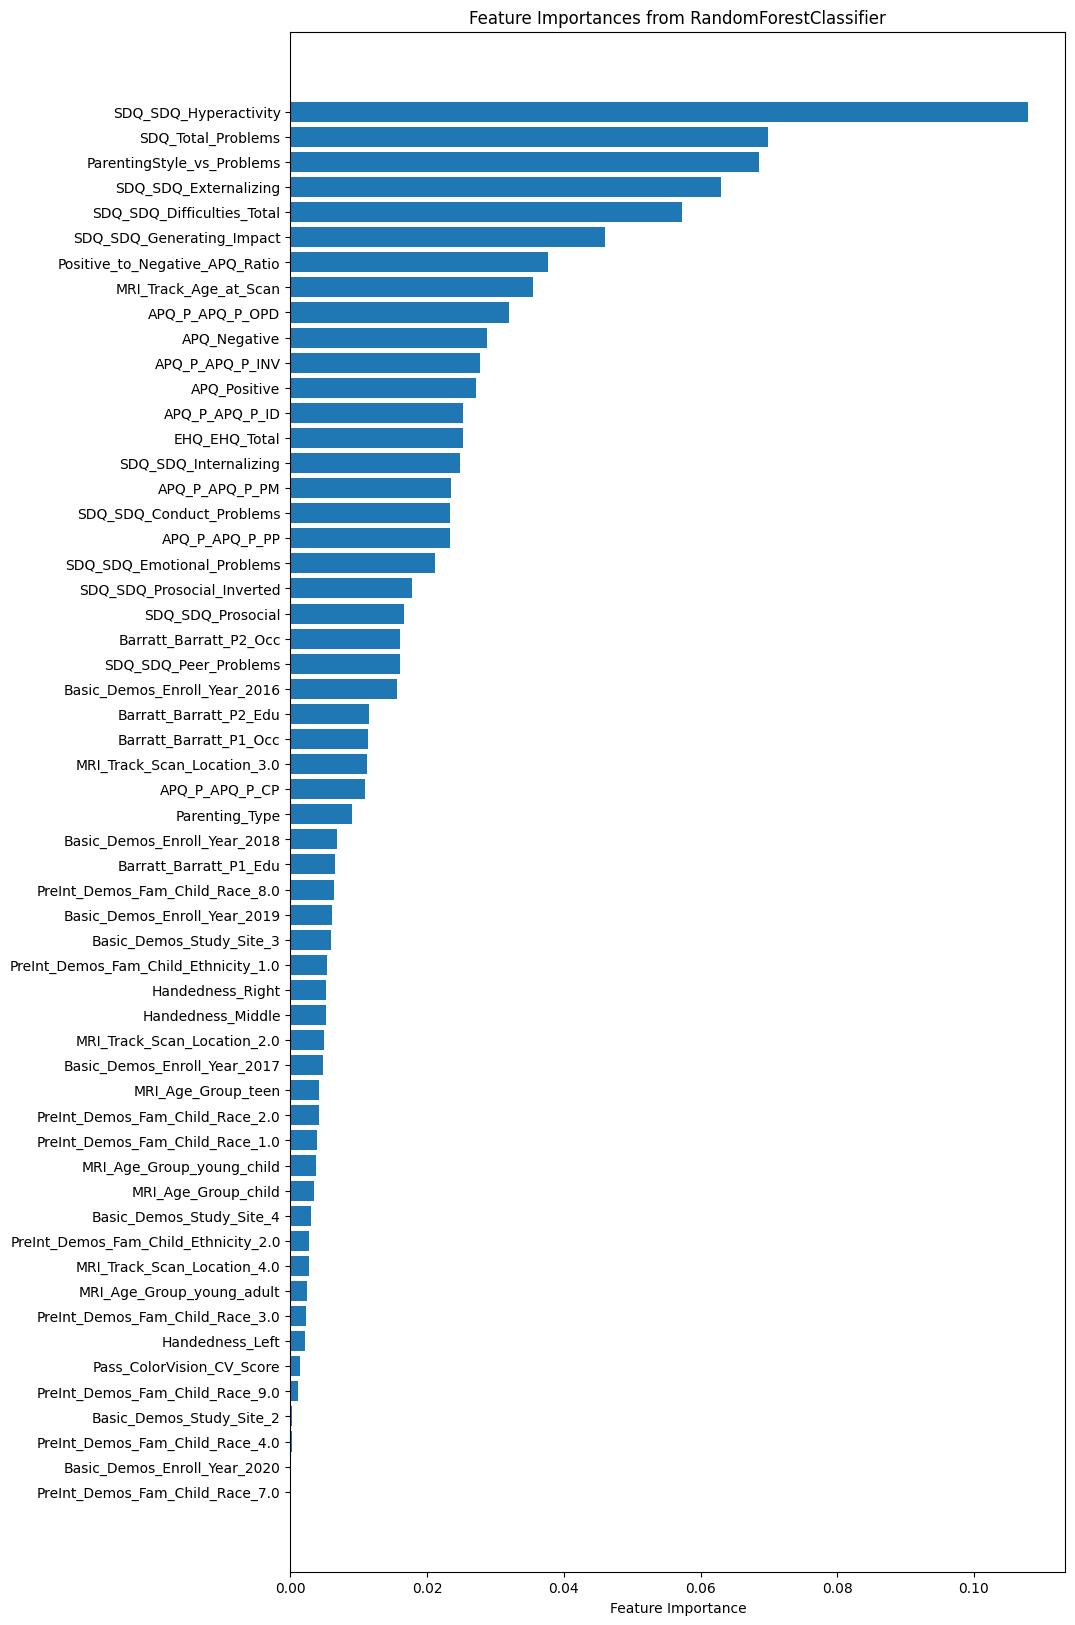

In [655]:
rf_pipeline.fit(X_train, y_train)

# Extract feature importance from the trained classifier
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Update feature names after transformations
if hasattr(rf_pipeline.named_steps['preprocessor'], 'transformers_'):
    transformer = rf_pipeline.named_steps['preprocessor']
    
    # Get feature names after OneHotEncoder for categorical variables
    num_transformed_names = transformer.transformers_[0][1].named_steps['power'].get_feature_names_out(input_features=num_names)
    
    # Get feature names after OneHotEncoder for categorical variables
    cat_transformed_names = transformer.transformers_[1][1].named_steps['encoder'].get_feature_names_out(input_features=cat_names)
    # Combine numerical and categorical feature names
    feature_names = np.concatenate([num_transformed_names, cat_transformed_names])

# Plot feature importances
plt.figure(figsize=(10, 20))
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # To show the most important features on top
plt.show()

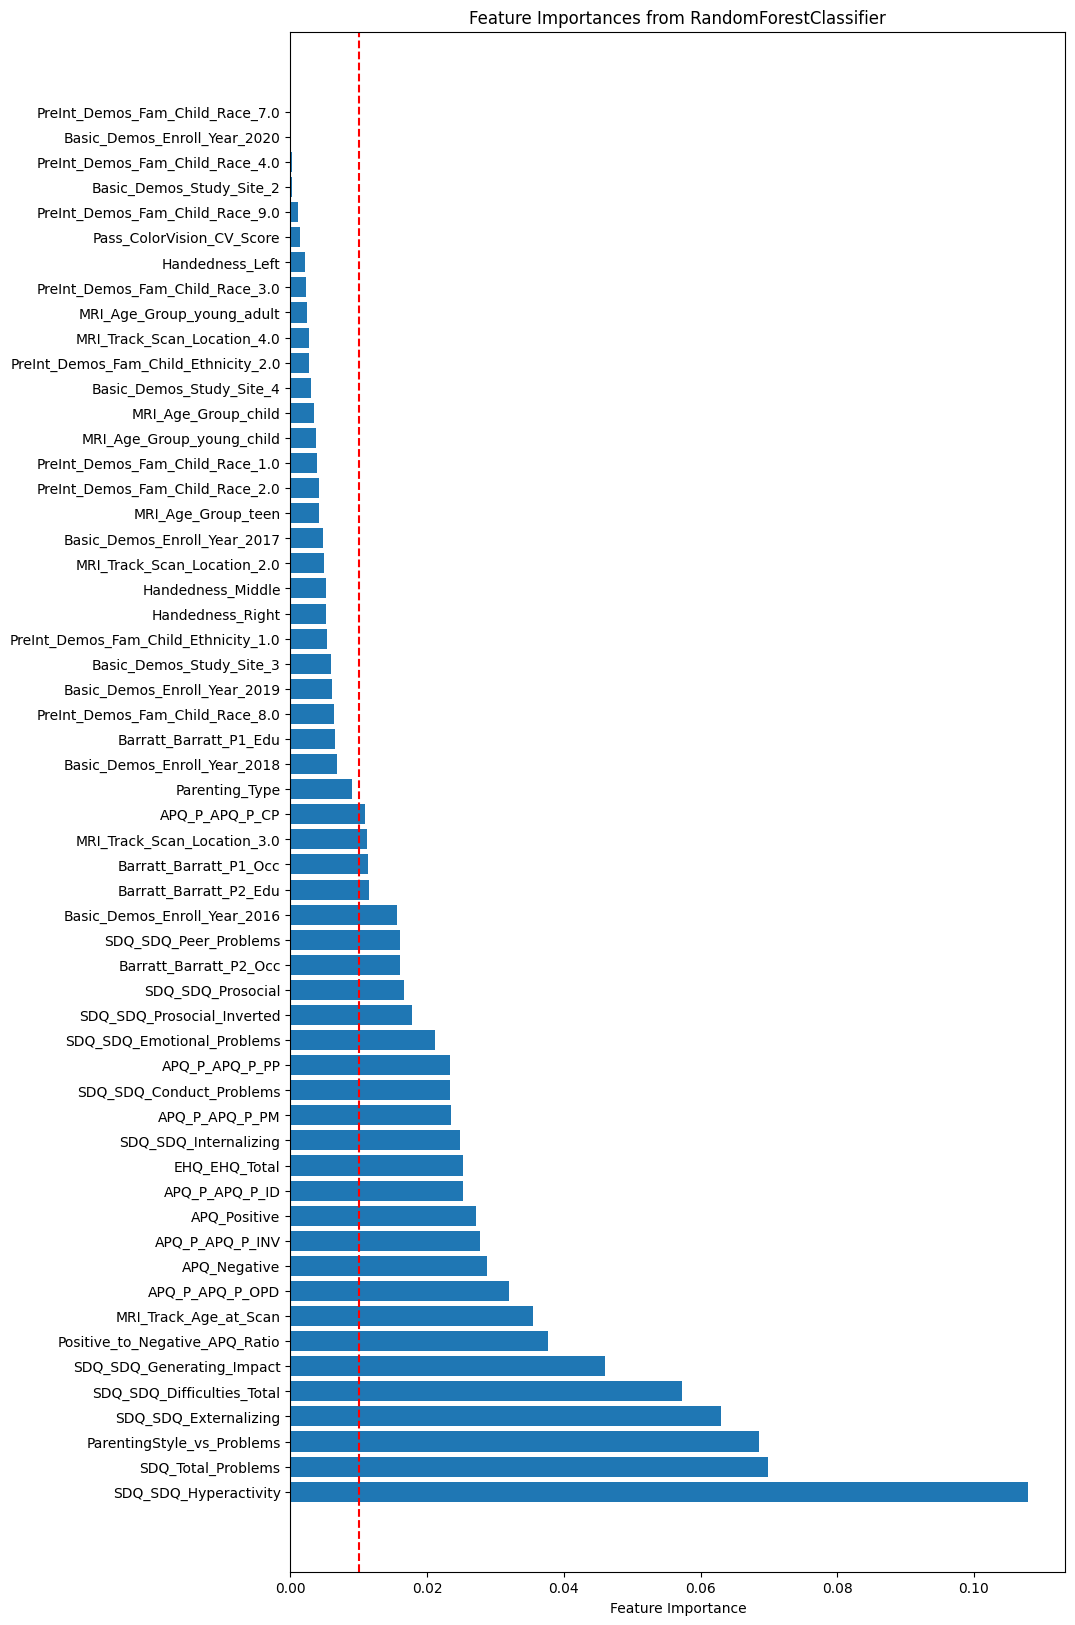

Selected Features:
EHQ_EHQ_Total
APQ_P_APQ_P_CP
APQ_P_APQ_P_ID
APQ_P_APQ_P_INV
APQ_P_APQ_P_OPD
APQ_P_APQ_P_PM
APQ_P_APQ_P_PP
SDQ_SDQ_Conduct_Problems
SDQ_SDQ_Difficulties_Total
SDQ_SDQ_Emotional_Problems
SDQ_SDQ_Externalizing
SDQ_SDQ_Generating_Impact
SDQ_SDQ_Hyperactivity
SDQ_SDQ_Internalizing
SDQ_SDQ_Peer_Problems
SDQ_SDQ_Prosocial
MRI_Track_Age_at_Scan
Barratt_Barratt_P1_Occ
Barratt_Barratt_P2_Edu
Barratt_Barratt_P2_Occ
Basic_Demos_Enroll_Year_2016
MRI_Track_Scan_Location_3.0
APQ_Positive
APQ_Negative
SDQ_SDQ_Prosocial_Inverted
SDQ_Total_Problems
ParentingStyle_vs_Problems
Positive_to_Negative_APQ_Ratio


In [656]:
from sklearn.feature_selection import SelectFromModel
X_transformed = rf_pipeline.named_steps['preprocessor'].transform(X_train)
importances = rf_pipeline.named_steps['classifier'].feature_importances_

if hasattr(rf_pipeline.named_steps['preprocessor'], 'transformers_'):
    transformer = rf_pipeline.named_steps['preprocessor']
    
    # Get feature names after OneHotEncoder for categorical variables
    num_transformed_names = transformer.transformers_[0][1].named_steps['power'].get_feature_names_out(input_features=num_names)
    
    # Get feature names after OneHotEncoder for categorical variables
    cat_transformed_names = transformer.transformers_[1][1].named_steps['encoder'].get_feature_names_out(input_features=cat_names)
    
    # Combine numerical and categorical feature names
    feature_names = np.concatenate([num_transformed_names, cat_transformed_names])
else:
    feature_names = X_train.columns
indices = np.argsort(importances)[::-1]  # Sort in descending order
plt.figure(figsize=(10, 20))
plt.barh(range(len(indices)), importances[indices], align='center') 
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from RandomForestClassifier')
threshold = 0.01
plt.axvline(x=threshold, color='r', linestyle='--')
plt.show()
# Get the indices of features that are above the threshold
selected_indices = np.where(importances >= threshold)[0]
# Get the names of the selected features
selected_features = feature_names[selected_indices]
print("Selected Features:")
for feature in selected_features:
    print(feature)


In [657]:
# X_train = X_train.drop(columns=selected_features)
# X_test = X_test.drop(columns=selected_features)
# X_train.shape, X_test.shape

In [658]:
# rf_pipeline.fit(X_train, y_train)

# # Cross-validation score
# scores = cross_val_score(rf_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

# print(f"Cross-validated scores: {scores}")
# print(f"Mean CV accuracy: {scores.mean():.2f}")

In [659]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Your pipeline
ada_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", AdaBoostClassifier(random_state=42))
])

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(ada_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Cross-validated scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default)

Cross-validated scores: [0.79381443 0.77319588 0.79381443 0.79381443 0.75257732 0.73195876
 0.72164948 0.67010309 0.72164948 0.77319588]
Mean CV accuracy: 0.75


c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [660]:
ada_pipeline.fit(X_train, y_train)
y_pred_ada = ada_pipeline.predict(X_test)
print('MSE AdaBoost:', mean_squared_error(y_test, y_pred_ada))

c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MSE AdaBoost: 0.18106995884773663


In [661]:
extra_tree = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", ExtraTreesClassifier(n_estimators=100, random_state=42))
])

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(extra_tree, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Cross-validated scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

Cross-validated scores: [0.82474227 0.79381443 0.78350515 0.7628866  0.75257732 0.81443299
 0.78350515 0.69072165 0.75257732 0.7628866 ]
Mean CV accuracy: 0.77


In [662]:
extra_tree.fit(X_train, y_train)
y_pred_extra = extra_tree.predict(X_test)
print('MSE ExtraTree:', mean_squared_error(y_test, y_pred_extra))

MSE ExtraTree: 0.20987654320987653


In [663]:
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Cross-validated scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:32] WARNING: C:\a

Cross-validated scores: [0.81443299 0.7628866  0.7628866  0.81443299 0.73195876 0.80412371
 0.7628866  0.73195876 0.73195876 0.7628866 ]
Mean CV accuracy: 0.77


c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [664]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
print('MSE XGBoost:', mean_squared_error(y_test, y_pred_xgb))

MSE XGBoost: 0.16872427983539096


c:\Users\Admins\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [665]:
log_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42, max_iter=1000))
])

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validation scores
scores = cross_val_score(log_pipeline, X_train, y_train, cv=skf, scoring='accuracy')

print(f"Cross-validated scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.2f}")

Cross-validated scores: [0.8556701  0.80412371 0.80412371 0.80412371 0.79381443 0.77319588
 0.77319588 0.70103093 0.74226804 0.8556701 ]
Mean CV accuracy: 0.79


In [666]:
log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_test)
print('MSE Logistic:', mean_squared_error(y_test, y_pred_log))

MSE Logistic: 0.18930041152263374


Choose **Logistic Regression** hoặc **Random Forest**